# Overfitting and Underfitting

A common danger in machine learning is **overfitting** - producing a model that performs well on the data that you train it on but generalizes poorly to any new data (`low bias` and `high variance`). This could involve learning `noise` in the data. The other side of this is **underfitting** - producing a model that doesn't perform well even on the training data (`high bias` and `low variance`).

Models that are too complex lead to `overfitting` and don't generalize well beyond the data they were trained on. The most fundamental approach to ensure our model is not too complex is `using different data to train the model and to test the model`. If the model performs well on the test data (completely separate and not used for training), then you can be more confident that it is `fitting` rather than `overfitting`.

This can go wrong if there are common patterns in the test and training data that wouldn't generalize to a larger dataset.

A bigger problem is if you use train/test split not just to judge a model but also to choose from among many models. In such a situation, you should **split the data into three parts**: a `training set` for building models, a `validation set` for choosing among trained models, and a `test set` for judging the final model.

<img src="images/over-underfitting.png" alt="" style="width: 600px;"/>


## Overfitting

`Overfitting` means that model we trained has trained “too well” and is now, well, fit too closely to the training dataset. This usually happens when the model is too complex (i.e. too many features/variables compared to the number of observations). This model will be very accurate on the training data but will probably be very not accurate on untrained or new data. It is because this model is not generalized (or not AS generalized), meaning you can generalize the results and can’t make any inferences on other data, which is, ultimately, what you are trying to do. Basically, when this happens, the model learns or describes the “noise” in the training data instead of the actual relationships between variables in the data. This noise, obviously, isn’t part in of any new dataset, and cannot be applied to it.

## Underfitting

In contrast to overfitting, when a model is `underfitted`, it means that the model does not fit the training data and therefore misses the trends in the data. It also means the model cannot be generalized to new data. As you probably guessed (or figured out!), this is usually the result of a very simple model (not enough predictors/independent variables). It could also happen when, for example, we fit a linear model (like linear regression) to data that is not linear. It almost goes without saying that this model will have poor predictive ability (on training data and can’t be generalized to other data).

It is worth noting the underfitting is not as prevalent as overfitting. Nevertheless, we want to avoid both of those problems in data analysis. You might say we are trying to find the middle ground between under and overfitting our model. As you will see, **train/test split** and **cross validation** help to avoid **overfitting** more than **underfitting**. Let’s dive into both of them!

## Train/Test Split

The data we use is usually split into training data and test data. The **training set** contains a known output and the model learns on this data in order to be generalized to other data later on. We have the **test dataset** (or subset) in order to test our model’s prediction on this subset.

<img src="images/train-test-split.png" alt="" style="width: 400px;"/>

For example, a default split between these two parts of the dataset is 80-20. A model will be trained on a random 80% of the dataset; then we will evaluate how well it did using the remaining 20%.

Since that 20% was never seen by the model during training, it is not optimized for, and we can except model performance "in the wild" to be closely approximated by model performance on our training data!

In [15]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
# Load the Diabetes dataset
columns = 'age sex bmi map tc ldl hdl tch ltg glu'.split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y

In [5]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [6]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [8]:
# Let’s see what (some of) the predictions are
predictions[0:5]

array([ 53.65007866,  78.2256475 , 176.99080403, 163.33652806,
        71.10794236])

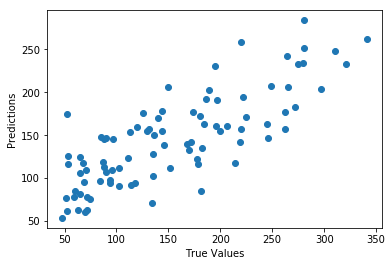

In [12]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show();

In [14]:
# Accuracy
print('Score:', model.score(X_test, y_test))

Score: 0.6092715982459742


The **train/test split** does have its `dangers` - what if the split we make isn’t random? What if one subset of our data has only people from a certain state, employees with a certain income level but not other income levels, only women or only people at a certain age? (imagine a file ordered by one of these). This will result in **overfitting**, even though we’re trying to avoid it! This is where **cross validation** comes in.

For more see Cross validation

For more see Bias-Variance Tradeoff

For more see Model Complexity Curve in 350_Model_Performance_Metrics